In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

from keras.datasets import mnist

import os
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras import layers

from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Flatten, Activation
from keras.models import Sequential, Model

from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


In [0]:
expPath='./content/drive/My Drive/Colab Notebooks/'
modelName='model_Autoencoder.h5'



In [9]:
import tensorflow as tf
import datetime, os

logs_base_dir = '/content/drive/My Drive/Colab Notebooks/autoencoder_log'
os.makedirs(logs_base_dir, exist_ok=True)
%load_ext tensorboard
%tensorboard --logdir '/content/drive/My Drive/Colab Notebooks/autoencoder_log'
# %reload_ext tensorboard


Output hidden; open in https://colab.research.google.com to view.

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_mask = np.isin(y_train, [1, 2])
test_mask = np.isin(y_test, [1, 2])
x_train, Y_train = x_train[train_mask], y_train[train_mask]
x_test, Y_test = x_test[test_mask], y_test[test_mask]



11493376/11490434 [==============================] - 2s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  


https://blog.keras.io/building-autoencoders-in-keras.html#
https://github.com/shibuiwilliam/Keras_Autoencoder/blob/master/Cifar_Conv_AutoEncoder.ipynb


In [0]:
from keras import regularizers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
def create_autoencoder():  

    input_img = Input(shape=(28, 28, 1)) 

    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer="adam", loss='mean_absolute_error',metrics=["binary_crossentropy"])# check wich metric to use 

#     autoencoder.summary()
    return autoencoder


Decreasing learning reate over time to get better results    

In [0]:

import math     
def step_decay(epoch):
	initial_lrate = 0.01
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

lrate_callback=keras.callbacks.LearningRateScheduler(step_decay, verbose=1)


In [0]:
filepath = '/content/drive/My Drive/Colab Notebooks/autoencoder_log/' + 'Auotoencoder.weights.h5'

def train_model():
  autoencoder = create_autoencoder()
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True)
  logdir = os.path.join(logs_base_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = keras.callbacks.TensorBoard(logdir,write_graph=True, write_images=True)
  EarlyStoppingCallback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=1)

  history = autoencoder.fit(
                    x_train,x_train,
                    steps_per_epoch=128,
                    epochs=100,
                    shuffle=True,
                    callbacks=[EarlyStoppingCallback,tensorboard_callback,
                               checkpoint ,lrate_callback])
  return autoencoder,history

model,history = train_model()

W0818 00:48:44.130516 139937863882624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 00:48:44.150721 139937863882624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 00:48:44.156597 139937863882624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 00:48:44.193117 139937863882624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0818 00:48:44.194302 1399378638

Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
128/128 [==============================] - 82s 641ms/step - loss: 0.0755 - binary_crossentropy: 0.5201

Epoch 00001: loss improved from inf to 0.07553, saving model to /content/drive/My Drive/Colab Notebooks/autoencoder_log/Auotoencoder.weights.h5
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
128/128 [==============================] - 77s 602ms/step - loss: 0.0335 - binary_crossentropy: 0.1333

Epoch 00002: loss improved from 0.07553 to 0.03350, saving model to /content/drive/My Drive/Colab Notebooks/autoencoder_log/Auotoencoder.weights.h5
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.01.
128/128 [==============================] - 77s 602ms/step - loss: 0.0282 - binary_crossentropy: 0.1003

Epoch 00003: loss improved from 0.03350 to 0.02824, saving model to /content/drive/My Drive/Colab Notebooks/autoencoder_log/Auotoencoder.weights.h5
Epoch 4/100

In [0]:
filepath = '/content/drive/My Drive/Colab Notebooks/autoencoder_log/' + 'Auotoencoder.weights.h5'

Improving Generalization Performance by Switching from Adam to SGD: https://arxiv.org/pdf/1712.07628.pdf
I didn't see any improvement therefore I stopped early. We can see the plato on Tensorboard

In [0]:
# load_model=keras.models.load_model(filepath)
# load_model.compile(optimizer="SGD", loss='binary_crossentropy',metrics=["mean_absolute_error"])
# def retrain_model(load_model):
#   autoencoder = load_model
#   checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True)
#   logdir = os.path.join(logs_base_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#   tensorboard_callback = keras.callbacks.TensorBoard(logdir,write_graph=True, write_images=True)
#   EarlyStoppingCallback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=1)

#   history = autoencoder.fit(
#                     x_train,x_train,
#                     steps_per_epoch=128,
#                     epochs=20,
#                     shuffle=True,
#                     callbacks=[EarlyStoppingCallback,tensorboard_callback,
#                                checkpoint])
#   return autoencoder,history

# new_model,history = retrain_model(load_model)

In [13]:
model=keras.models.load_model(filepath)

W0818 05:05:07.102951 140345013065600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 05:05:07.153906 140345013065600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 05:05:07.198716 140345013065600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 05:05:07.200049 140345013065600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0818 05:05:07.203325 140345013

In [0]:
import matplotlib.pyplot as plt
def reconstract_img(img_set):
  decoded_imgs = model.predict(x_test)
  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(1,n):
      # display original
      ax = plt.subplot(2, n, i)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + n)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

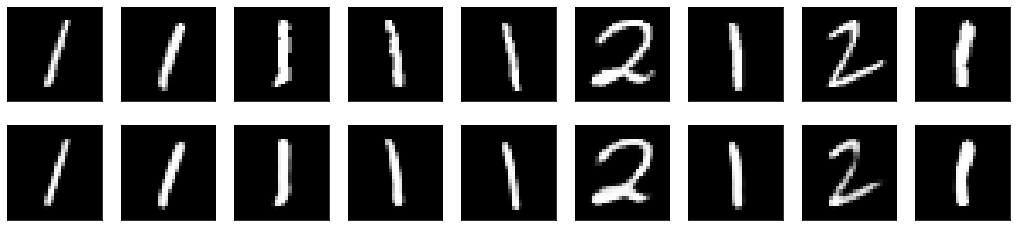

In [15]:
x_test_reconstract = reconstract_img(x_test)

In [0]:
# from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

img_width, img_height = 28, 28

# load all images into a list
def get_x_validation(folder_path):
  images = []
  img_arr = os.listdir(folder_path) 
  img_df = pd.DataFrame(img_arr,columns=['name']) # convert list to numpy array

  for img in os.listdir(folder_path):
      img = os.path.join(folder_path, img)
      img = image.load_img(img, color_mode = 'grayscale',
                           target_size=(img_width, img_height))
      img = image.img_to_array(img)
      img = np.expand_dims(img, axis=0)
      images.append(img)

  # stack up images list to pass for prediction
  x_test = np.vstack(images)
  x_test = x_test.astype('float32') / 255.

  return x_test, img_df


In [0]:
x_validation, img_df =  get_x_validation('/content/drive/My Drive/Colab Notebooks/seedx_data')

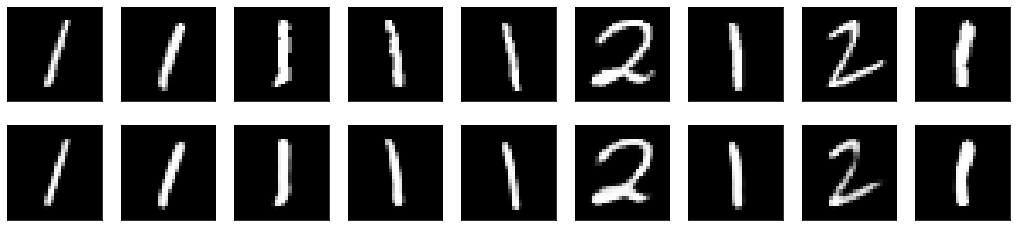

In [18]:
x_validation_reconstract = reconstract_img(x_validation)

In [0]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [0]:
def get_mes_df(img_set):
  decoded_imgs = model.predict(img_set)
  all_mses=[]

  for i in range(len(img_set)):
      mse_value = mse(img_set[i].reshape(28, 28),decoded_imgs[i].reshape(28, 28))
      all_mses.append(mse_value)

  error_df_val = pd.DataFrame({'reconstruction_error':all_mses})
  print(error_df_val.describe())
  fig = plt.figure()
  ax = fig.add_subplot(111)

  counts, bins, bars = ax.hist(error_df_val.reconstruction_error.values, bins=5)
  print(counts)
  print(bins)
  return error_df_val

       reconstruction_error
count           2167.000000
mean               0.005863
std                0.005637
min                0.000447
25%                0.001608
50%                0.004041
75%                0.008432
max                0.044614
[1722.  368.   56.   16.    5.]
[0.00044674 0.00928021 0.01811368 0.02694714 0.03578061 0.04461408]


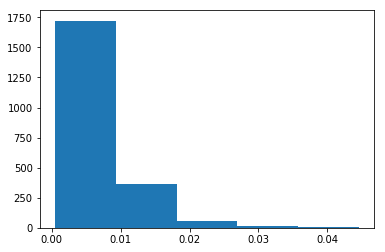

In [21]:
mse_test_df = get_mes_df(x_test)

       reconstruction_error
count            100.000000
mean               0.018951
std                0.046449
min                0.000447
25%                0.001579
50%                0.005440
75%                0.010421
max                0.221323
[92.  1.  0.  3.  4.]
[0.00044674 0.04462198 0.08879721 0.13297245 0.17714768 0.22132292]


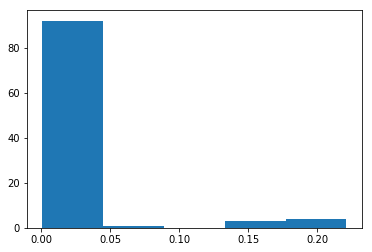

In [22]:
mse_val_df = get_mes_df(x_validation)

Find the reconstruction error outliers to do anomaly detection on poor model performents - out of distribution mse reconstruction error 

In [0]:
msk = (mse_val_df.values> (np.mean(mse_test_df.values)+2*np.std(mse_test_df.values)))

In [0]:
img_df = pd.concat([img_df,mse_val_df], axis=1, sort=False)

In the final part we look to find outliers - photos where the reconstructed error is larger than 2*std + mean of the x_test reconstruction errors. We can see that we still have one true negative - 9309 which it's reconstruction error is lager than photo 104. It is an out-of-distribution error which is difficult to distinguish. A different autoencoder might perform better.  

1.   List item
2.   List item



In [25]:
img_df[msk]

name  reconstruction_error
0     99.png              0.143792
1     66.png              0.171397
2    160.png              0.135765
3     39.png              0.214061
4    104.png              0.018632
5     25.png              0.221323
6    109.png              0.064842
7     89.png              0.043268
8    125.png              0.201750
9    251.png              0.185667
93  9309.png              0.018988

ROC curve and AUC would be a good way to assess the results but in the instructions I was requested not to handlable the data. 
A nice way to explain the predicted results is shown here: https://towardsdatascience.com/extreme-rare-event-classification-using-autoencoders-in-keras-a565b386f098